# Author Analysis
From feature selection, we found that the author of a book has a very high association to how popular a book is, with an MI score of 0.47535, which is the highest out of all the features when compared to book popularity. We will further investigate the author data that here.

In [114]:
# load in libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import normalized_mutual_info_score
from sklearn.model_selection import train_test_split

# read in files we want to use
books_df = pd.read_csv("BX-Books-Clean.csv")
users_df = pd.read_csv("BX-Users-Clean.csv")
ratings_df = pd.read_csv("BX-Ratings-Clean.csv")

In [115]:
# Let's group by author and take a look at the books and their popularity scores for the top 20 authors
# first merge ratings and users based on user I-D
users_all_info = pd.merge(ratings_df, users_df, on="User-ID", how="left")

# now add in all the book info for each user
users_all_info = pd.merge(users_all_info, books_df, on="ISBN", how="left")

# group by the authors
authors = users_all_info.groupby("Book-Author")

# popularity score of each author
author_popularity = authors["Author-Popularity"].unique().apply(lambda x: x[0]
                                                                ).reindex()

# books each author has written
author_books = authors["Book-Title"].unique().reindex()

# isbns of the book each author has written
author_isbns = authors["ISBN"].unique().reindex()

# number of books each author has written
author_books_count = authors["ISBN"].unique().apply(len)

# popularity scores of the books each author has written
author_books_popularity = authors["Popularity-Score"].apply(list).reindex()

# countries of the readers of each author
author_countries = authors["User-Country_x"].unique().reindex()

# numbe rof unique countries of the readers of each author
author_num_countries = authors["User-Country_x"].nunique().reindex()

# ages of the readers of each author
author_audience_age = authors["Median-Age"].unique().reindex()

In [116]:
# merge all the DataFrames together
author_info = pd.concat([author_popularity, author_books, author_books_count, 
                         author_isbns, author_books_popularity, 
                         author_countries, author_num_countries,
                         author_audience_age], axis=1)

# rename the columns appropriately 
new_col_names = ["Author-Popularity", "Books-Written", "Num-Books", 
                 "ISBNs-Of-Books", "Popularity-Of-Books", "Audience-Countries", 
                 "Num-Countries", "Audience-Ages"]
author_info.columns = new_col_names

# sort the DataFrame by the most popular authors
author_info = author_info.sort_values(by="Author-Popularity", ascending=False)

In [117]:
author_info.to_csv("Author-Info.csv", index=True)

["['united states' nan 'italy' 'canada' 'finland' 'zimbabwe' 'portugal'\n 'qatar' 'united kingdom' 'australia' 'germany' 'new zealand']"

switzerland

netherlands' '' '' 'south korea'\n 'trinidad tobago' 'malaysia']"
singapore'\n 'new zealand
austria' 'romania

## Top 5 Authors

In [118]:
author_info.head(5)

,Author-Popularity,Books-Written,Num-Books,ISBNs-Of-Books,Popularity-Of-Books,Audience-Countries,Num-Countries,Audience-Ages
Book-Author,,,,,,,,
mitchalbom,13.860196,"[Tuesdays with Morrie: An Old Man, a Young Man...",3,"[0385484518, 0786868716, 076790592X]","[15.21729251392421, 15.21729251392421, 15.2172...","[united states, spain, canada, nan, malaysia, ...",14,"[36.0, 39.0, 38.0]"
emmamclaughlin,13.150060,[The Nanny Diaries: A Novel],2,"[0312278586, 0312291639]","[13.73513449484678, 12.564984878769, 13.735134...","[united states, canada, nan, malaysia, austral...",14,"[33.0, 34.0]"
alicesebold,13.076031,"[The Lovely Bones: A Novel, The Lovely Bones, ...",4,"[0316666343, 0316168815, 0316096199, 0684857820]","[17.90970083972859, 17.90970083972859, 10.4466...","[united states, nan, iran, united kingdom, aus...",20,"[34.0, 35.0]"
suekidd,13.025381,[The Secret Life of Bees],3,"[0142001740, 0670894605, 0670032379]","[16.261694812800734, 16.261694812800734, 16.26...","[united states, canada, united kingdom, nan, n...",10,"[37.0, 40.0, 44.0]"
rebeccawells,12.509118,[Divine Secrets of the Ya-Ya Sisterhood : A No...,5,"[0060173289, 0060976845, 0060517794, 006092833...","[10.779283523472904, 13.296348786563614, 10.77...","[united states, united kingdom, nan, canada, m...",19,"[36.0, 34.0, 33.0]"


## Lowest 5 Authors

In [119]:
author_info.tail(5)

,Author-Popularity,Books-Written,Num-Books,ISBNs-Of-Books,Popularity-Of-Books,Audience-Countries,Num-Countries,Audience-Ages
Book-Author,,,,,,,,
stephenlaws,3.534823,[Darkfall],1,[0843952180],"[3.5348231273135924, 3.5348231273135924, 3.534...","[united states, canada]",2,[30.0]
shawnwong,3.408691,[AMERICAN KNEES],1,[0684803046],"[3.408691367367276, 3.408691367367276, 3.40869...","[united states, egypt]",2,[34.0]
emmatennant,3.408691,[Pemberley or Pride and Prejudice Continued],1,[0312107935],"[3.408691367367276, 3.408691367367276, 3.40869...","[nan, united kingdom, united states]",2,[37.0]
rollins,2.907043,[Black Coffee Blues],1,[1880985055],"[2.9070425307259566, 2.9070425307259566, 2.907...","[united states, canada, nan]",2,[33.0]
gregoryward,2.726953,[The Internet Bride],1,[1552781631],"[2.7269530938938207, 2.7269530938938207, 2.726...","[nan, united states]",1,[38.0]


## Some graphs

### Author Popularity vs Number of Books Written by the Author

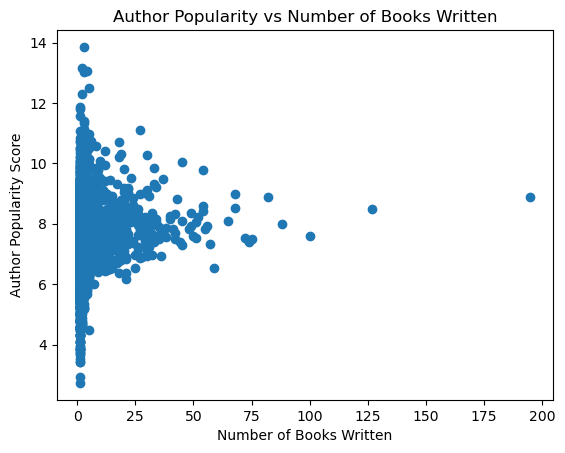

In [122]:
plt.scatter(author_info["Num-Books"], author_info["Author-Popularity"])
plt.title("Author Popularity vs Number of Books Written", size=12)
plt.xlabel("Number of Books Written")
plt.ylabel("Author Popularity Score")
plt.show()
plt.close()

### Author Popularity vs Number of Unique Countries of Author's Readers

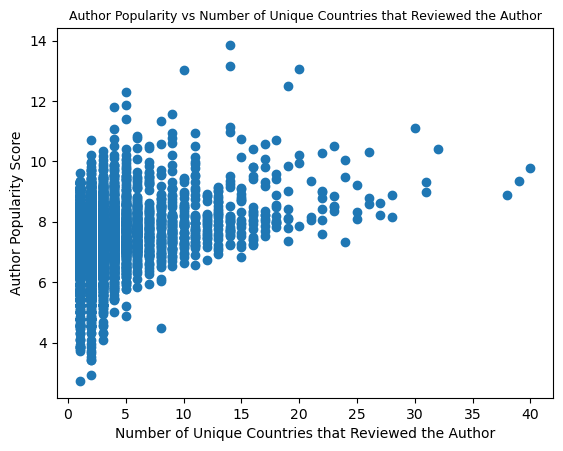

In [121]:
plt.scatter(author_info["Num-Countries"], author_info["Author-Popularity"])
plt.title("Author Popularity vs Number of Unique Countries that Reviewed "
          "the Author", size=9)
plt.xlabel("Number of Unique Countries that Reviewed "
          "the Author")
plt.ylabel("Author Popularity Score")
plt.show()
plt.close()